# ANALYSIS OF EMPLOYEE DATA

In [1]:
#importing operating system module
import os

#importing pandas library
import pandas as pd

#importing list directory from os
from os import listdir


    

In [31]:
#identifying current working directory
print(os.getcwd())

C:\WINDOWS\system32


In [32]:
#loading employee data into pandas
employee_data = pd.read_csv("C:\WINDOWS\system32\Employee data (1).csv")

#checking the data type of column headers
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        474 non-null    int64 
 1   gender    474 non-null    object
 2   educ      474 non-null    int64 
 3   jobcat    474 non-null    int64 
 4   salary    474 non-null    int64 
 5   salbegin  474 non-null    int64 
 6   jobtime   474 non-null    int64 
 7   prevexp   474 non-null    int64 
 8   minority  474 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 33.5+ KB


In [34]:
#checking the shape of the employee data - 474 rows and 9 columns
employee_data.shape

(474, 9)

we have 474 observations and 9 variables in employee data.

In [37]:
#finding out if we have missing value; boolean response - no missing value(s) in  employee data
print(employee_data.isnull().any(axis = 0))

id          False
gender      False
educ        False
jobcat      False
salary      False
salbegin    False
jobtime     False
prevexp     False
minority    False
dtype: bool


There are no missing values in this data

In [35]:
# information about objects 
employee_data.describe(include = 'object')

,gender
count,474
unique,2
top,m
freq,258


gender is a string (words - m & f) and there is a need to convert to integer for the purpose of statistical analysis

In [45]:
#changing data type of gender(string) to integer - where male = 1, and female = 0 by generating dummy variables
employee_data1 = pd.get_dummies(employee_data["gender"])
employee_data2 = pd.concat((employee_data1, employee_data), axis=1) #concactenate binary data into dataframe
employee_data2 = employee_data2.drop(["gender"], axis=1)
employee_data2 = employee_data2.drop(["f"], axis=1)
employee_data_new = employee_data2.rename(columns={"m": "gender"})

print(employee_data_new)


     gender   id  educ  jobcat  salary  salbegin  jobtime  prevexp  minority
0         1    1    15       3   57000     27000       98      144         0
1         1    2    16       1   40200     18750       98       36         0
2         0    3    12       1   21450     12000       98      381         0
3         0    4     8       1   21900     13200       98      190         0
4         1    5    15       1   45000     21000       98      138         0
..      ...  ...   ...     ...     ...       ...      ...      ...       ...
469       1  446    16       3  100000     44100       66      128         1
470       1  447    15       1   49000     20550       66       86         1
471       0  448    12       1   16350     10200       66      163         1
472       1  470    12       1   26250     15750       64       69         1
473       1  471    15       1   26400     15750       64       32         1

[474 rows x 9 columns]


In [72]:
#confirming data type of gender
employee_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gender    474 non-null    uint8
 1   id        474 non-null    int64
 2   educ      474 non-null    int64
 3   jobcat    474 non-null    int64
 4   salary    474 non-null    int64
 5   salbegin  474 non-null    int64
 6   jobtime   474 non-null    int64
 7   prevexp   474 non-null    int64
 8   minority  474 non-null    int64
dtypes: int64(8), uint8(1)
memory usage: 30.2 KB


In [105]:
#conducting descriptive statistics for new employee data
employee_data_new.describe().round(2)

,gender,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
count,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00,474.00
mean,0.54,237.50,13.49,1.41,34419.57,17016.09,81.11,95.86,0.22
std,0.50,136.98,2.88,0.77,17075.66,7870.64,10.06,104.59,0.41
min,0.00,1.00,8.00,1.00,15750.00,9000.00,63.00,0.00,0.00
25%,0.00,119.25,12.00,1.00,24000.00,12487.50,72.00,19.25,0.00
50%,1.00,237.50,12.00,1.00,28875.00,15000.00,81.00,55.00,0.00
75%,1.00,355.75,15.00,1.00,36937.50,17490.00,90.00,138.75,0.00
max,1.00,474.00,21.00,3.00,135000.00,79980.00,98.00,476.00,1.00


Interesting to note by logical reasoning that:

Males are about 54.4% of the population - 258 compared to 216 for females as seen in the average of the descriptive statistics.

75% quartile (36,937) for salaries is not far from the mean of 34,419. This shows the presence of high salary earners i.e. outliers (leaning towards  the maximum value of 135,000). This is also true for salbegin and gives an insight into the company's salary structure.

Minority representation is about 22% has shown by the mean which translates to 104 staff (we are able to reach this 
conclusion for gender and minority due to the binary nature of the data i.e. male = 1, female = 0 and minority = 1 and non-minority = 0).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

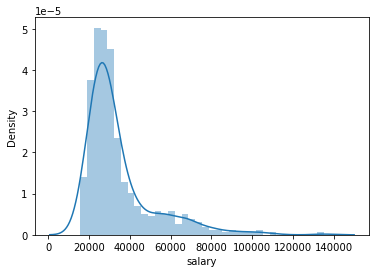

In [76]:
# initialize the libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#distplot of salary in employee data       
sns.distplot(employee_data_new["salary"])

The distribution above is positively skewed indicating there are outliers forcing the mean towards the right.

In [52]:
#correlation amongst variables in new employee data
employee_data_new.corr()

,gender,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
gender,1.000000,-0.079470,0.355986,0.377660,0.449923,0.456676,0.066467,0.164857,0.075668
id,-0.079470,1.000000,-0.057212,-0.013504,-0.095544,0.007812,-0.998186,-0.003417,-0.032338
educ,0.355986,-0.057212,1.000000,0.513854,0.660559,0.633196,0.047379,-0.252353,-0.132889
jobcat,0.377660,-0.013504,0.513854,1.000000,0.780115,0.754662,0.005329,0.062645,-0.143781
salary,0.449923,-0.095544,0.660559,0.780115,1.000000,0.880117,0.084092,-0.097467,-0.177337
salbegin,0.456676,0.007812,0.633196,0.754662,0.880117,1.000000,-0.019753,0.045136,-0.157598
jobtime,0.066467,-0.998186,0.047379,0.005329,0.084092,-0.019753,1.000000,0.002978,0.049501
prevexp,0.164857,-0.003417,-0.252353,0.062645,-0.097467,0.045136,0.002978,1.000000,0.144747
minority,0.075668,-0.032338,-0.132889,-0.143781,-0.177337,-0.157598,0.049501,0.144747,1.000000


In [ ]:
educ, jobcat and salbegin show positive relationship to salary, with salbegin showing the strongest positive correlation.
We can infer from this relationship that salbegin is the base or start salary of employees upon which subsequent 
increments or bonuses are applied. 

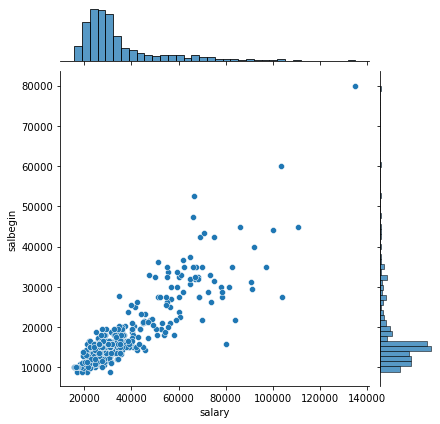

In [68]:
# visuals showing the relationship between salbegin and salary

sns.jointplot(x = 'salary', y = 'salbegin', data=employee_data_new)

The jointplot below shows positive relationship between salbegin and salary. There are also no employees with  salary 
below the salbegin as show in the jointplot above. This suggests the presence of a generic bonus(increments)- a reward for
'team performance'. This business rewards team play.

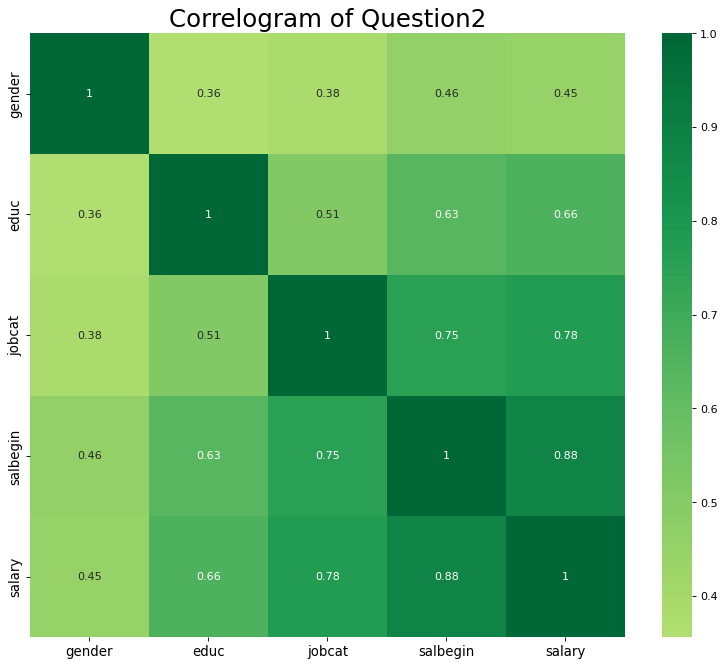

In [67]:
#running correlation with independent variables
my_data = employee_data_new[["gender", "educ", "jobcat", "salbegin", "salary"]]
my_data.corr().round(2)

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(my_data.corr(), xticklabels=my_data.corr().columns, yticklabels=my_data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Question2', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

salbegin, jobcat, educ were significantly correlated with salary and will be used in our regression analysis.

In [82]:
# reviewing jobcat relationship to salary
employee_data_new.sort_values(by = ["jobcat", "salary"], ascending = True)


,gender,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
293,0,378,8,1,15750,10200,70,275,0
263,0,338,8,1,15900,10200,74,43,0
71,0,90,8,1,16200,9750,92,0,0
165,0,224,12,1,16200,10200,82,0,0
319,0,411,12,1,16200,10200,68,180,0
...,...,...,...,...,...,...,...,...,...
469,1,446,16,3,100000,44100,66,128,1
266,1,343,16,3,103500,60000,73,150,0
14,1,18,16,3,103750,27510,97,70,0
24,1,32,19,3,110625,45000,96,120,0


In [ ]:
There seem to be a bias against the female gender as the top five earners are male and  least earners are females.

jobcat is a categorisation of employees where category 3 are the highest earners and category 1 are the lowest earners.
jobcat can be taken as the job category which influences the base salary of an employee (these two variables are
are positively correlated). 


In [103]:
#getting more insights from the female employee statistics
female_employee = employee_data_new.loc[:,:] [employee_data_new.loc[:,"gender"] == 0]
print(female_employee)

     gender   id  educ  jobcat  salary  salbegin  jobtime  prevexp  minority
2         0    3    12       1   21450     12000       98      381         0
3         0    4     8       1   21900     13200       98      190         0
7         0    8    12       1   21900      9750       98        0         0
8         0    9    15       1   27900     12750       98      115         0
9         0   10    12       1   24000     13500       98      244         0
..      ...  ...   ...     ...     ...       ...      ...      ...       ...
457       0  384    12       1   20850     13050       70      127         1
458       0  403    12       1   21300     11250       69        3         1
459       0  404    12       1   24300     15000       69      121         1
460       0  405    12       1   19650     13950       69      133         1
471       0  448    12       1   16350     10200       66      163         1

[216 rows x 9 columns]


In [104]:
#descriptive statistics on female gender data
female_employee.describe()

,gender,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.0,249.384259,12.370370,1.092593,26031.921296,13091.967593,80.379630,77.037037,0.185185
std,0.0,131.130737,2.319152,0.421228,7558.021452,2935.599213,9.676361,95.012061,0.389350
min,0.0,3.000000,8.000000,1.000000,15750.000000,9000.000000,63.000000,0.000000,0.000000
25%,0.0,141.750000,12.000000,1.000000,21562.500000,11193.750000,72.000000,7.000000,0.000000
50%,0.0,247.500000,12.000000,1.000000,24300.000000,12375.000000,81.000000,32.000000,0.000000
75%,0.0,360.250000,15.000000,1.000000,28500.000000,14250.000000,88.000000,122.250000,0.000000
max,0.0,474.000000,17.000000,3.000000,58125.000000,30000.000000,98.000000,412.000000,1.000000


In [110]:
male_employee = employee_data_new.loc[:,:] [employee_data_new.loc[:,"gender"] == 1]
male_employee.describe()

,gender,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
count,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.00000,258.000000,258.000000
mean,1.0,227.550388,14.430233,1.678295,41441.782946,20301.395349,81.72093,111.620155,0.248062
std,0.0,141.168440,2.979335,0.891592,19499.213736,9111.780867,10.35102,109.692296,0.432727
min,1.0,1.000000,8.000000,1.000000,19650.000000,9000.000000,63.00000,3.000000,0.000000
25%,1.0,103.250000,12.000000,1.000000,28050.000000,15000.000000,73.25000,37.250000,0.000000
50%,1.0,216.500000,15.000000,1.000000,32850.000000,15750.000000,82.00000,67.500000,0.000000
75%,1.0,342.500000,16.000000,3.000000,50412.500000,22372.500000,91.00000,149.750000,0.000000
max,1.0,472.000000,21.000000,3.000000,135000.000000,79980.000000,98.00000,476.000000,1.000000


In [ ]:
educ is positively correlated to salary and jobcat(job category). We assume this variable refers the level of the 
education (qualification) of the employee.

Upon further analysis, average salaries for the female is 26,032 compared to 41,441 for a male employee. 
This pattern is same for level of education and base salary(salbegin) which has a lower averages for the female employee
compared to a male even both gender have put in about same period of time on the job on the average.


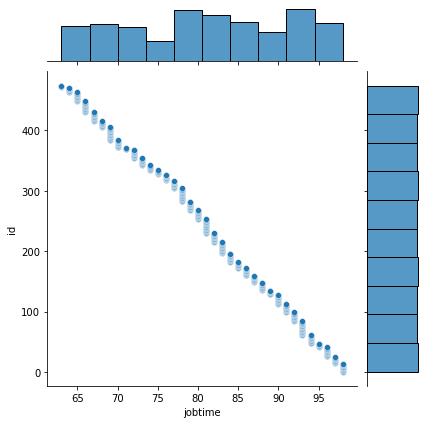

In [55]:
# visuals between id and jobtime

sns.jointplot(x = 'jobtime', y = 'id', data=employee_data_new)

There is a strong negative relationship (correlation) between id and jobtime (shown in the jointplot above). We can reasonably conclude that id is employee identity number while jobtime is time spent so far on the job by each employee(expressed in weeks or months). Consequently, the first employee with identity number 1 would have spent the longest time spent as an employee which is 98 weeks for employee data.

prevexp seems to be the previous work experience but is not correlated with salary. Our conclusion is that previous work experience is not a key factor in sourcing majority of employees. There is preference for young and more energetic recruits on a generic scale. This leads us to conclude that employee data is from a professional sports business.


In [113]:
#Renaming column header of new employee data
employee_data_new.rename(columns = {'id': 'staff_id','educ': 'level_educ', 'jobcat':'job_category', 'salbegin': 'base_salary', 'jobtime': 'job_exp', 'prevexp': 'prev_exp'}, inplace = True)
employee_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   gender        474 non-null    uint8
 1   staff_id      474 non-null    int64
 2   level_educ    474 non-null    int64
 3   job_category  474 non-null    int64
 4   salary        474 non-null    int64
 5   base_salary   474 non-null    int64
 6   job_exp       474 non-null    int64
 7   prev_exp      474 non-null    int64
 8   minority      474 non-null    int64
dtypes: int64(8), uint8(1)
memory usage: 30.2 KB


In [114]:
#inititiating libraries for regression
import statsmodels.formula.api as smf
import statsmodels.api as sm


# running a multivariate regression with statsmodel for new employee data
x = employee_data_new[['base_salary', 'job_category', 'level_educ']]
y = employee_data_new['salary']
# fit a OLS model 
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     716.2
Date:                Fri, 13 May 2022   Prob (F-statistic):          7.82e-175
Time:                        23:59:16   Log-Likelihood:                -4884.3
No. Observations:                 474   AIC:                             9777.
Df Residuals:                     470   BIC:                             9793.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7786.9699   1632.558     -4.770      0.000    -1.1e+04   -4578.953
base_salary      1.2744      0.072     17.749      0.000       1.133       1.415
job_category  5657.0181    659.427      8.579      0.000    4361.229    6952.807
level_educ     929.2638    149.823      6.202      0.000     634.858    1223.670
==============================================================================
Omnibus:                      203.100   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1699.390
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                      11.678   Cond. No.                     9.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-square is 82%. This is the proportion of variance explained collectively by the independent variables- base_salary, job_category and level_educ account. 
There is multi-collinearity in the data-set (base_salary, job_category and level_educ are correlated). Hence the need to eliminate some variables in order to increase the reliability of inferences from this regression.


In [116]:
# running a bi-variate regression with base_salary & salary
x = employee_data_new[['base_salary']]
y = employee_data_new['salary']
# fit a OLS model 
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1622.
Date:                Sat, 14 May 2022   Prob (F-statistic):          8.20e-155
Time:                        16:09:08   Log-Likelihood:                -4938.3
No. Observations:                 474   AIC:                             9881.
Df Residuals:                     472   BIC:                             9889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1928.2058    888.680      2.170      0.031     181.947    3674.464
base_salary     1.9094      0.047     40.276      0.000       1.816       2.003
==============================================================================
Omnibus:                      199.258   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1534.909
Skew:                           1.630   Prob(JB):                         0.00
Kurtosis:                      11.191   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The proportion of variance for salary that is explained by the base salary is 77.5%.
Consequently, base_salary impacts salary the most of the independent variables.

### REFERENCES
1. Michael Rueda(2022), Can Professional Sports offer Diversity & Inclusion insight for all Industries? Forbes.com

2. How to convert categorical variable to numeric in pandas (2021, December 01) https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/